**Построение модели оттока сотрудников для разработки стратегии удержания**

**Описание кейса**

 Увольнение сотрудников дорого обходится компаниям. Стоимость замены ушедшего сотрудника зачастую очень высока. Исследования Центра Американского прогресса говорят, что компании обычно тратят около одной пятой части годовой зарплаты сотрудника, чтобы найти ему замену. И траты эти могут изрядно возрасти, если требуется замена для руководящего или высокооплачиваемого сотрудника. Затраты приходятся на проведение интервью в процессе поиска замены, бонусы на входе, и потерю производительности работы в течение первых месяцев, пока сотрудник входит в новую роль.

Понимание когда и почему сотрудники более всего склонны к уходу из компании поможет качественнее их удерживать, или хотя бы заранее планировать работы по поиску новых сотрудников.

Я воспользуюсь пошаговым систематичным подходом, применимым для решения всевозможных задач машинного обучения. Этот проект подпадает под задачи HR аналитики, или People Analytics.

В этом исследовании мы попытаемся решить следующие вопросы:

Чем похожи сотрудники, покидающие компанию?

Каковы ключевые индикаторы уходящих сотрудников?

Какие стратегии могут быть приняты для улучшения удержания сотрудников?

Так как у нас есть данные по уволившимся сотрудникам, задача определяется как стандартная задача классификации с обучением, в которой метка это бинарная переменная (0 - работающий сотрудник, 1 - уволившийся). А целевой переменной Y является вероятность ухода сотрудника из компании.

**Импорт необходимых библиотек**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
import plotly.figure_factory as ff
from matplotlib.ticker import LogLocator
from sklearn.preprocessing import *
import seaborn as sns
from sklearn.model_selection import *
from sklearn.metrics import *

In [ ]:
# Библиотеки для модели
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

**Загрузка базы данных**

In [ ]:
upload = files.upload()
# data: https://github.com/Radfull/outflow_model/blob/main/WA_Fn-UseC_-HR-Employee-Attrition.xlsx
df = pd.read_excel('WA_Fn-UseC_-HR-Employee-Attrition.xlsx', sheet_name=0, index_col=0)

Saving WA_Fn-UseC_-HR-Employee-Attrition.xlsx to WA_Fn-UseC_-HR-Employee-Attrition.xlsx


In [ ]:
df.shape

(1470, 34)

In [ ]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 41 to 34
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                   1470

In [ ]:
df = df.reset_index()

In [ ]:
df.isnull().any()

,0
Age,False
Attrition,False
BusinessTravel,False
DailyRate,False
Department,False
DistanceFromHome,False
Education,False
EducationField,False
EmployeeCount,False
EmployeeNumber,False


Можно заметить, что пропуски в наших данных отсутсвуют. В реальности такое событие крайне маловероятно.

**Распределения параметров**

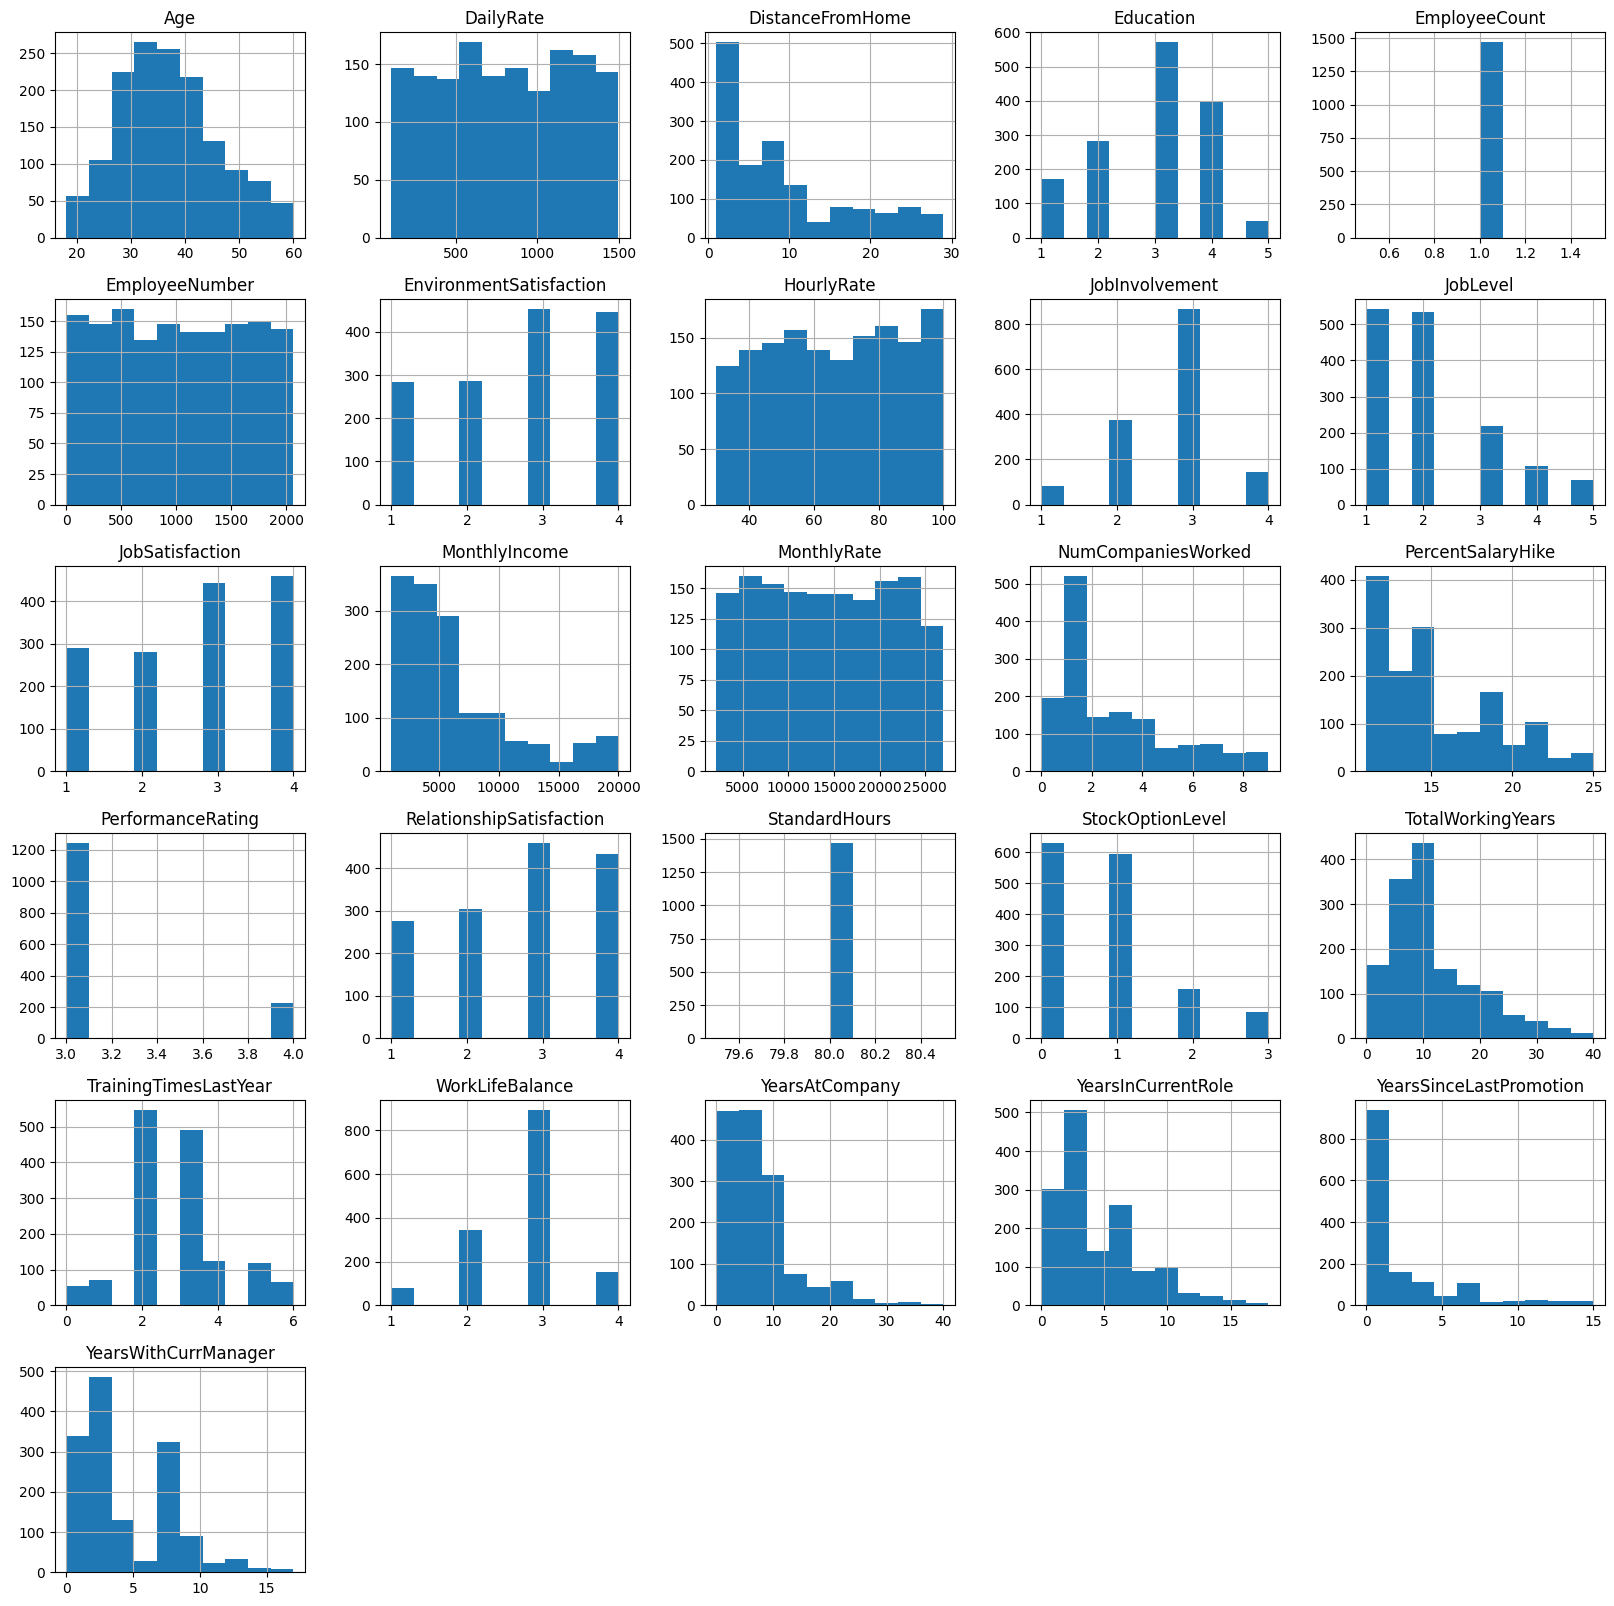

In [ ]:
df.hist(figsize=(20,20))
plt.show()

Можно сделать несколько наблюдений на основе информации и гистограмм для числовых признаков:

Некоторые признаки имеют распределение с «тяжелыми хвостами» с перекосом вправо. Например, Месячный доход (MonthlyIncome), Расстояние от дома (DistanceFromHome), Кол-во лет в компании (YearsAtCompany). Возможно потребуются методы преобразование данных для приведения распределения к нормальному перед тренировкой модели.

* Распределения Возраста сотрудников нормальное с небольшим перекосом вправо.
* Основная масса персонала от 25 до 40 лет.

* Признаки кол-во сотрудников (EmployeeCount) и кол-во рабочих часов (StandardHours) одинаковы для всех сотрудников. Скорее всего они будут избыточными признаками.

* ИД сотрудника (Employee Number) это уникальный номер сотрудника из-за чего он получил псевдоравномерное распределение.

Для определения отличительных черт активных и бывших сотрудников, рассмотрим распределия определенных параметров для обеих групп.

In [ ]:
x1 = df.loc[df['Attrition'] == 'No', 'Age']
x2 = df.loc[df['Attrition'] == 'Yes', 'Age']

In [ ]:
x2.head()

,Age
0,41
2,37
14,28
21,36
24,34


In [ ]:
# Функция нормализации данных
def normalization(x):
  s = sum(x.values)
  for i in x.index:
    x[i] = x[i] / s

In [ ]:
x1 = x1.value_counts().sort_index()
x2 = x2.value_counts().sort_index()

In [ ]:
normalization(x1)

<ipython-input-12-d19e180247ea>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.0032441200324412004' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x[i] = x[i] / s


In [ ]:
x1

,count
Age,
18,0.003244
19,0.002433
20,0.004055
21,0.005677
22,0.008921
23,0.008110
24,0.015410
25,0.016221
26,0.021898


In [ ]:
normalization(x2)

<ipython-input-12-d19e180247ea>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.016877637130801686' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x[i] = x[i] / s


In [ ]:
x2

,count
Age,
18,0.016878
19,0.025316
20,0.025316
21,0.025316
22,0.021097
23,0.016878
24,0.029536
25,0.025316
26,0.050633


In [ ]:
df[df['Attrition'] == 'No']['Age'].mean()

37.561232765612324

In [ ]:
df[df['Attrition'] == 'Yes']['Age'].mean()

33.607594936708864

 Нарисуем график ядерной оценки плотности с разбивкой по целевому признаку. **Ядерная оценка плотности** - это непараметрический способ оценки функции плотности вероятности случайной величины.

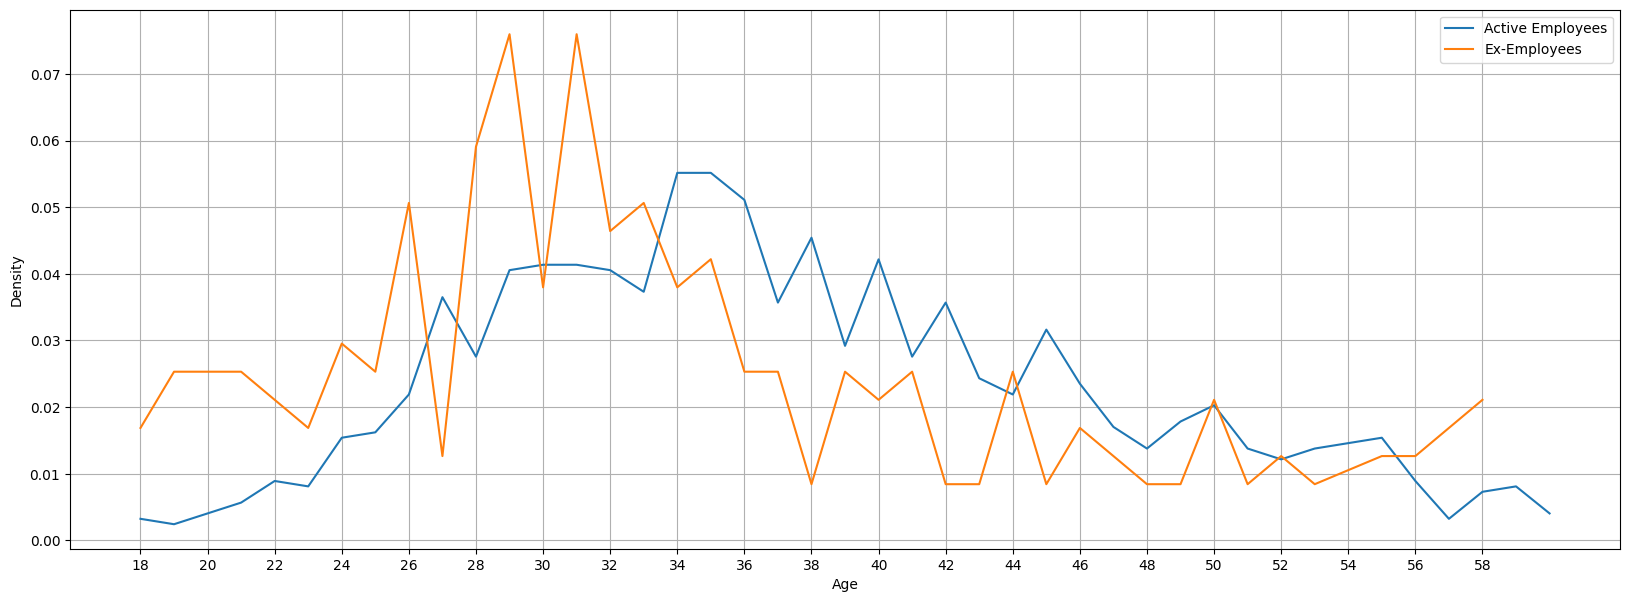

In [ ]:
fig = plt.figure(figsize=(20, 7))

ax = fig.add_subplot()

plt.plot(x1.index, x1.values, label='Active Employees')
plt.plot(x2.index, x2.values, label='Ex-Employees')
plt.grid()
plt.legend()
plt.xticks(range(18, 60, 2))
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

В среднем бывший сотрудник примерно на 4 года младше действующего.

In [108]:
gender_not_employee = df[df['Attrition'] == 'Yes']['Gender']

In [109]:
gender_not_employee = gender_not_employee.value_counts()

In [114]:
gender_not_employee

,count
Gender,
Male,0.170068
Female,0.147959


In [113]:
gender_not_employee['Male'] = gender_not_employee['Male'] / len(df[df['Gender'] == 'Male'])
gender_not_employee['Female'] = gender_not_employee['Female'] / len(df[df['Gender'] == 'Female'])

<ipython-input-113-8b256c733119>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.17006802721088435' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gender_not_employee['Male'] = gender_not_employee['Male'] / len(df[df['Gender'] == 'Male'])


In [117]:
marital_status_not_employee = df[df['Attrition'] == 'Yes']['MaritalStatus'].value_counts()

In [120]:
for i in marital_status_not_employee.index:
 marital_status_not_employee[i] = marital_status_not_employee[i] / len(df[df['MaritalStatus'] == i])

<ipython-input-120-c337ca6cab57>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.2553191489361702' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  marital_status_not_employee[i] = marital_status_not_employee[i] / len(df[df['MaritalStatus'] == i])


In [121]:
marital_status_not_employee

,count
MaritalStatus,
Single,0.255319
Married,0.124814
Divorced,0.100917


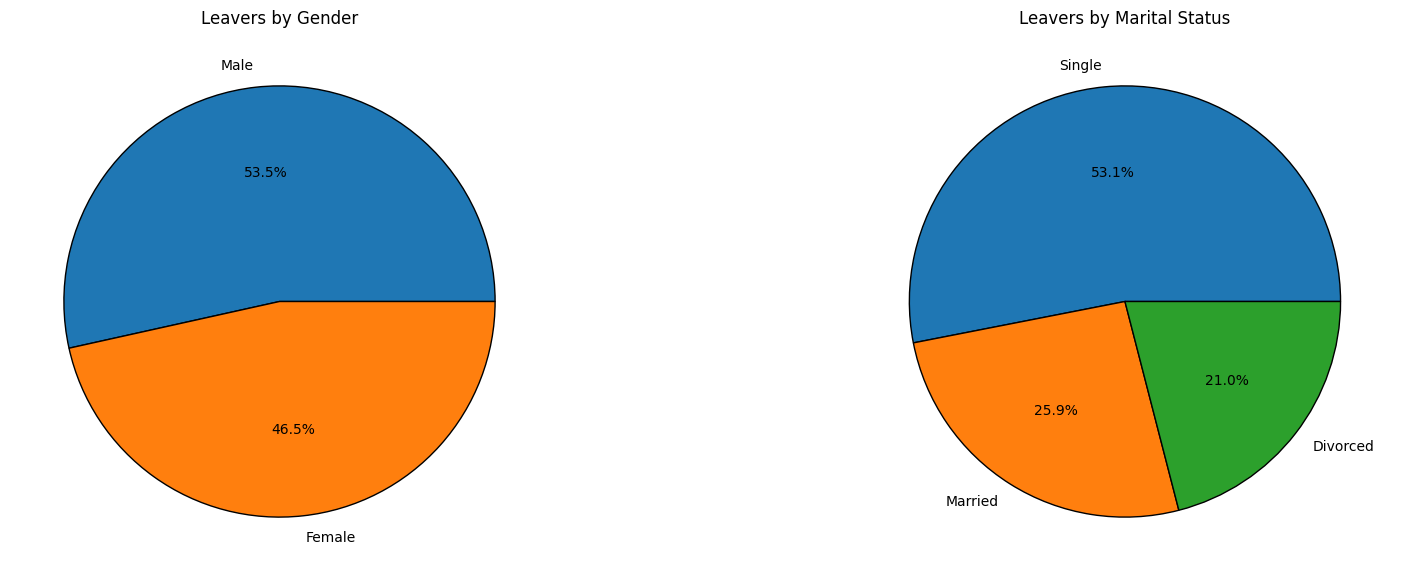

In [123]:
fig = plt.figure(figsize=(20, 7))

ax1 = fig.add_subplot(1,2,1)

ax1.pie(gender_not_employee, labels=gender_not_employee.index,
        autopct = '%1.1f%%', wedgeprops = {"edgecolor" : "black", 'linewidth': 1, 'antialiased': True})

plt.title('Leavers by Gender')
ax2 = fig.add_subplot(1,2,2)

ax2.pie(marital_status_not_employee, labels=marital_status_not_employee.index,
        autopct = '%1.1f%%', wedgeprops = {"edgecolor" : "black", 'linewidth': 1, 'antialiased': True})
plt.title('Leavers by Marital Status')

plt.show()

In [ ]:
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Married,673
Single,470
Divorced,327


In [124]:
df_job_role_not_emp = df[df['Attrition'] == 'Yes']['JobRole'].value_counts()

In [126]:
for i in df_job_role_not_emp.index:
 df_job_role_not_emp[i] = df_job_role_not_emp[i] / len(df[df['JobRole'] == i])

<ipython-input-126-a2dff648e018>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.23938223938223938' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_job_role_not_emp[i] = df_job_role_not_emp[i] / len(df[df['JobRole'] == i])


In [139]:
df_job_role_not_emp = df_job_role_not_emp.sort_values(ascending=False)

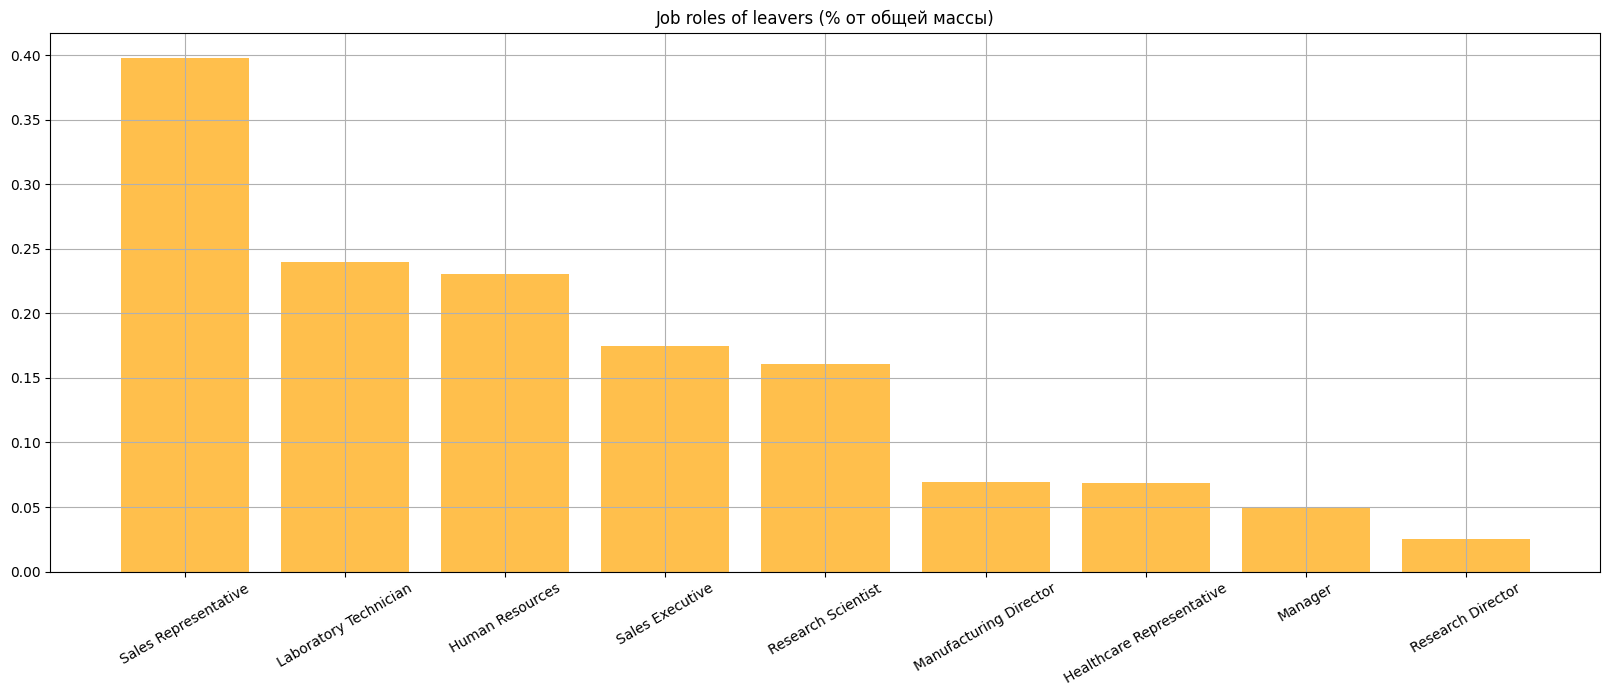

In [141]:
fig = plt.figure(figsize=(20, 7))

ax = fig.add_subplot()

ax.bar(df_job_role_not_emp.index, df_job_role_not_emp.values, color='orange', alpha=0.7)

plt.title('Job roles of leavers (% от общей массы)')
plt.xticks(rotation=30)
plt.grid()
plt.show()

In [ ]:
df['JobRole'].value_counts()

,count
JobRole,
Sales Executive,326
Research Scientist,292
Laboratory Technician,259
Manufacturing Director,145
Healthcare Representative,131
Manager,102
Sales Representative,83
Research Director,80
Human Resources,52


In [ ]:
year_at_com_emp = df[df['Attrition'] == 'No']['YearsAtCompany'].value_counts().sort_index()
year_at_com_not_emp = df[df['Attrition'] == 'Yes']['YearsAtCompany'].value_counts().sort_index()

In [ ]:
year_at_com_emp

,count
YearsAtCompany,
0,28
1,112
2,100
3,108
4,91
5,175
6,67
7,79
8,71


In [ ]:
normalization(year_at_com_emp)

<ipython-input-12-d19e180247ea>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.0227088402270884' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x[i] = x[i] / s


In [ ]:
normalization(year_at_com_not_emp)

<ipython-input-12-d19e180247ea>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.06751054852320675' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x[i] = x[i] / s


In [ ]:
df[df['Attrition'] == 'Yes']['YearsAtCompany'].mean()

5.1308016877637135

In [ ]:
df[df['Attrition'] == 'No']['YearsAtCompany'].mean()


7.369018653690187

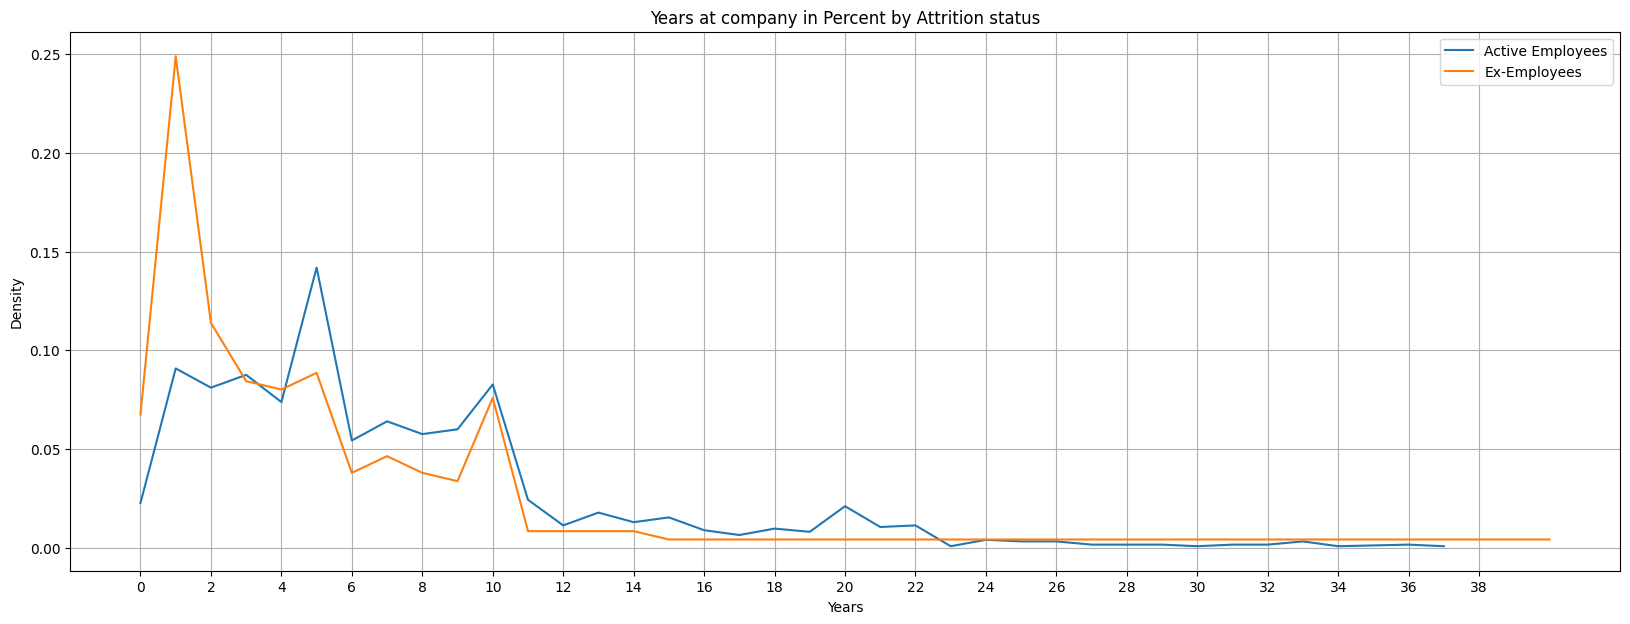

In [ ]:
fig = plt.figure(figsize=(20, 7))

ax = fig.add_subplot()

ax.plot(year_at_com_emp.index, year_at_com_emp.values, label='Active Employees')
ax.plot(year_at_com_not_emp.index, year_at_com_not_emp.values, label='Ex-Employees')

plt.grid()
plt.legend()
plt.title('Years at company in Percent by Attrition status')
plt.xticks(range(0, 40, 2))
plt.xlabel('Years')
plt.ylabel('Density')
plt.show()

In [ ]:
df['YearsWithCurrManager'].head(5)

,YearsWithCurrManager
0,5
1,7
2,0
3,0
4,2


In [ ]:
years_with_curr_manager_emp = df[df['Attrition'] == 'No']['YearsWithCurrManager'].value_counts().sort_index()
years_with_curr_manager_not_emp = df[df['Attrition'] == 'Yes']['YearsWithCurrManager'].value_counts().sort_index()

In [ ]:
normalization(years_with_curr_manager_emp)

<ipython-input-12-d19e180247ea>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.14436334144363341' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x[i] = x[i] / s


In [ ]:
normalization(years_with_curr_manager_not_emp)

<ipython-input-12-d19e180247ea>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.35864978902953587' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x[i] = x[i] / s


In [ ]:
years_with_curr_manager_not_emp

,count
YearsWithCurrManager,
0,0.358650
1,0.046414
2,0.210970
3,0.080169
4,0.046414
5,0.016878
6,0.016878
7,0.130802
8,0.042194


In [ ]:
df[df['Attrition'] == 'No']['YearsWithCurrManager'].mean()

4.367396593673966

In [ ]:
df[df['Attrition'] == 'Yes']['YearsWithCurrManager'].mean()

2.852320675105485

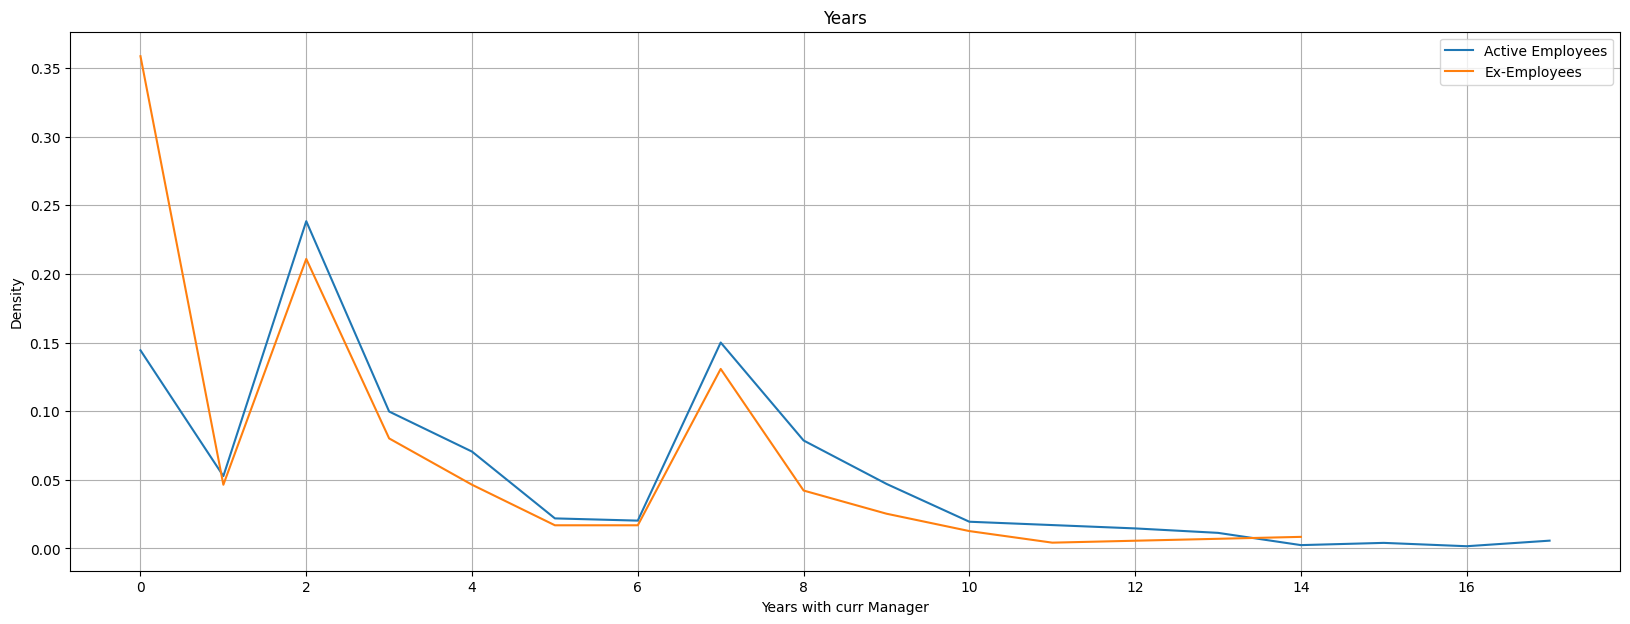

In [ ]:
fig = plt.figure(figsize=(20, 7))

ax = fig.add_subplot()

ax.plot(years_with_curr_manager_emp.index, years_with_curr_manager_emp.values, label='Active Employees')
ax.plot(years_with_curr_manager_not_emp.index, years_with_curr_manager_not_emp.values, label='Ex-Employees')

plt.grid()
plt.legend()
plt.title('Years with curr Manager in Percent by Attrition status')
plt.xticks(range(0, 18, 2))
plt.xlabel('Years with curr Manager')
plt.ylabel('Density')
plt.show()

In [ ]:
df['OverTime'].head(5)

,OverTime
0,Yes
1,No
2,Yes
3,Yes
4,No


In [ ]:
over_time_emp = df[df['Attrition'] == 'No']['OverTime'].value_counts()
over_time_not_emp = df[df['Attrition'] == 'Yes']['OverTime'].value_counts()

In [ ]:
over_time_not_emp

,count
OverTime,
Yes,127
No,110


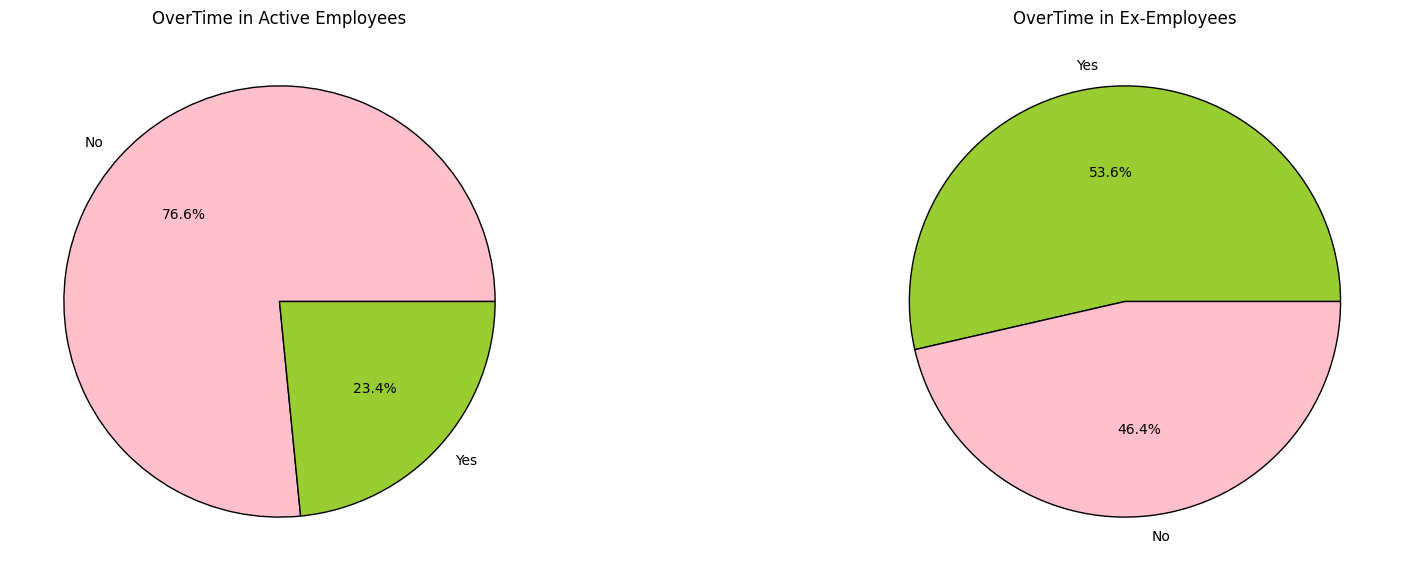

In [ ]:
fig = plt.figure(figsize=(20, 7))

ax1 = fig.add_subplot(1,2,1)

ax1.pie(over_time_emp.values, labels=over_time_emp.index,
        autopct = '%1.1f%%', wedgeprops = {"edgecolor" : "black", 'linewidth': 1, 'antialiased': True}, colors=['pink', 'yellowgreen'])

plt.title('OverTime in Active Employees')
ax2 = fig.add_subplot(1,2,2)

ax2.pie(over_time_not_emp.values, labels=over_time_not_emp.index,
        autopct = '%1.1f%%', wedgeprops = {"edgecolor" : "black", 'linewidth': 1, 'antialiased': True}, colors=['yellowgreen', 'pink'])
plt.title('OverTime in Ex-Employees')

plt.show()

In [ ]:
df['MonthlyIncome'].head()

,MonthlyIncome
0,5993
1,5130
2,2090
3,2909
4,3468


In [ ]:
df['MonthlyIncome'].mean()

6502.931292517007

In [ ]:
df[df['Attrition'] == 'Yes']['MonthlyIncome'].mean()

4787.0928270042195

In [ ]:
df[df['Attrition'] == 'No']['MonthlyIncome'].mean()

6832.739659367397

In [ ]:
df[df['Attrition'] == 'Yes']['MonthlyIncome']

,MonthlyIncome
0,5993
2,2090
14,2028
21,3407
24,2960
26,3919
33,2086
34,2293
36,2683
42,2293


In [ ]:
df['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


In [ ]:
x1 = df.loc[df['Attrition'] == 'No', 'MonthlyIncome']
x2 = df.loc[df['Attrition'] == 'Yes', 'MonthlyIncome']

data = pd.DataFrame({'Active Employees': x1, 'Ex-Employees': x2})

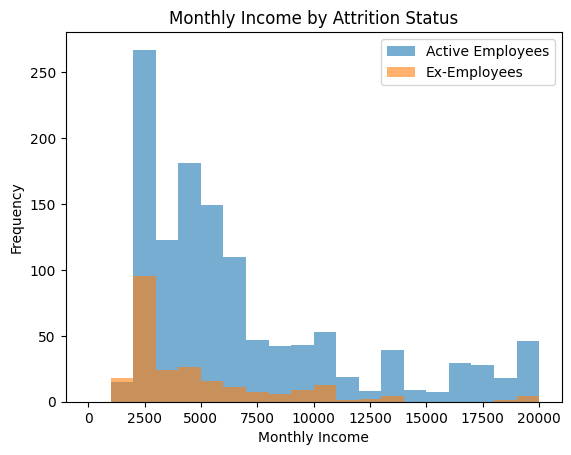

In [ ]:

data.plot.hist(alpha=0.6, bins=20, range=(0,20000), title='Monthly Income by Attrition Status')
plt.xlabel('Monthly Income')
plt.show()

In [ ]:
df['Over18'].value_counts()

,count
Over18,
Y,1470


In [ ]:
df_corr = df.copy()

In [ ]:
object_columns = df_corr.select_dtypes(include=['object']).columns

In [ ]:
df_corr = df_corr.drop(object_columns, axis=1)

In [ ]:
df_corr['Target'] = df['Attrition'].apply(
    lambda x: 0 if x == 'No' else 1)

In [ ]:
df_corr.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Target
0,41,1102,1,2,1,1,2,94,3,2,...,80,0,8,0,1,6,4,0,5,1
1,49,279,8,1,1,2,3,61,2,2,...,80,1,10,3,3,10,7,1,7,0
2,37,1373,2,2,1,4,4,92,2,1,...,80,0,7,3,3,0,0,0,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,80,0,8,3,3,8,7,3,0,0
4,27,591,2,1,1,7,1,40,3,1,...,80,1,6,3,3,2,2,2,2,0


In [ ]:
df_corr = df_corr.reset_index()

In [ ]:
df_corr = df_corr.drop(['EmployeeCount', 'StandardHours'], axis=1)

In [ ]:
correlations = df_corr.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


<Axes: >

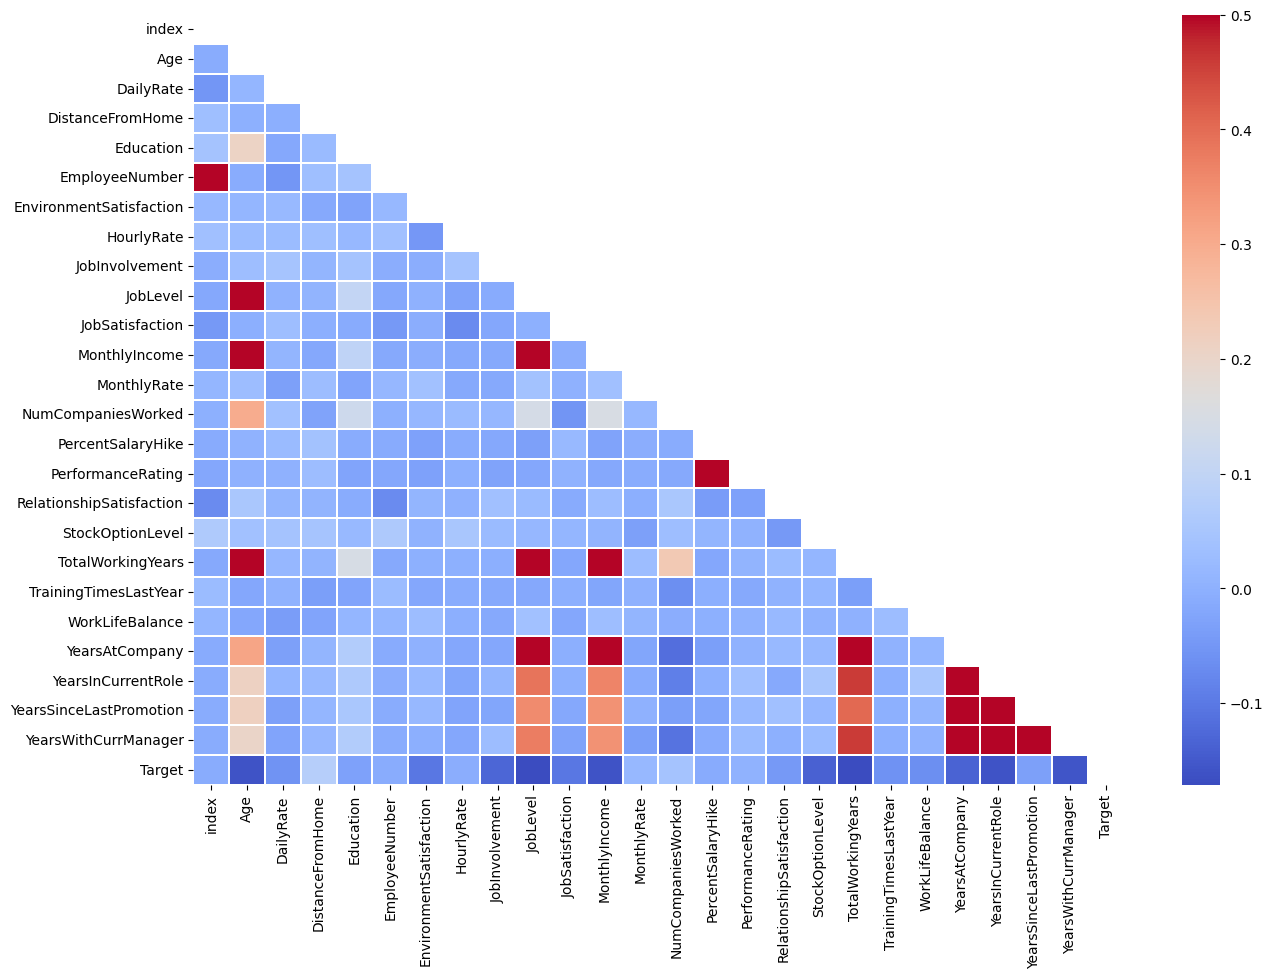

In [ ]:
 #Calculate correlations
corr = df_corr.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="coolwarm")

In [ ]:
df_trans = df.copy()

# Кодирование (Encoding)

In [ ]:
le = LabelEncoder()

In [ ]:
le_count = 0
for col in df_trans.columns[1:]:
  if df_trans[col].dtype == 'object':
    if len(list(df_trans[col].unique())) == 2:
      le.fit(df[col])
      df_trans[col] = le.transform(df[col])
      le_count += 1

print(f'{le_count} col encoded')

3 col encoded


In [ ]:
df_trans.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df_trans = pd.get_dummies(df_trans, drop_first=True)

In [ ]:
df_trans.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,...,False,False,False,False,False,False,True,False,False,True
1,49,0,279,8,1,1,2,3,1,61,...,False,False,False,False,False,True,False,False,True,False
2,37,1,1373,2,2,1,4,4,1,92,...,False,True,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,1,5,4,0,56,...,False,False,False,False,False,True,False,False,True,False
4,27,0,591,2,1,1,7,1,1,40,...,False,True,False,False,False,False,False,False,True,False


# Шкалирование (Scaling)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 5))

In [ ]:
df_cols = list(df_trans.columns)
df_cols.remove('Attrition')

In [ ]:
for col in df_cols:
  df_trans[col] = df_trans[col].astype(float)
  df_trans[[col]] = scaler.fit_transform(df_trans[[col]])

df_trans['Attrition'] = pd.to_numeric(df_trans['Attrition'], downcast='float')


In [ ]:
df_trans.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,1.0,3.579098,0.000000,1.25,0.0,0.000000,1.666667,0.0,4.571429,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,3.690476,0.0,0.633500,1.250000,0.00,0.0,0.002419,3.333333,5.0,2.214286,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,2.261905,1.0,4.549034,0.178571,1.25,0.0,0.007257,5.000000,5.0,4.428571,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.785714,0.0,4.617037,0.357143,3.75,0.0,0.009676,5.000000,0.0,1.857143,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,1.071429,0.0,1.750179,0.178571,0.00,0.0,0.014514,0.000000,5.0,0.714286,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


# Разбивка данных на обучающую и тестовую выборки

In [ ]:

target = df_trans['Attrition'].copy()

In [ ]:
# Удаляем целевой объект и избыточные объекты из набора данных
df_trans.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber',
            'StandardHours'], axis=1, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_trans, target, test_size=0.25, random_state=7, stratify=target)

In [ ]:
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (1102, 44)
y_train dataset:  (1102,)
X_test dataset:  (368, 44)
y_test dataset:  (368,)


# Построение моделей машинного обучения

**Базовые модели**

Давайте сначала посмотрим базовые модели с использованием готовых гиперпараметров, прежде чем мы перейдем к более сложным решениям:

*   Логистическая регрессия (Logistic Regression)
*   Случайный лес (Random Forest)
*   Метод опорных векторов (SVM)
*   Метод k-ближайших соседей (KNN)
*   Классификатор на базе дерева решений (Decision Tree Classifier)
*   Гауссовский наивный байесовский классификатор (Gaussian NB)

Давайте оценим каждую модель по очереди и предоставим оценки точности и стандартного отклонения.

In [ ]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

Оценим каждую модель по очереди и определим показатели точности и стандартного отклонения

**Точность классификации (Classification Accuracy)** -  это точность предсказаний по отношению к общему числу предсказаний. Это наиболее распространенная метрика оценки для задач классификации.

Она действительно подходит только тогда, когда в каждом классе имеется равное количество наблюдений и все прогнозы и ошибки предсказания одинаково важны. В этом проекте данные не сбалансированы, поэтому надо обратить внимание на другую метрику моделей.

**Площадь под кривой ROC (Area under ROC Curve, AUC)** - это метрика производительности для задач бинарной классификации.

**AUC** показывает способность модели различать положительные и отрицательные классы и лучше подходит для этого проекта. Значение площади равное 1.0 соответствует идеальной модели. Значение площади 0.5 соответствует случайной модели.

In [ ]:
models

[('Logistic Regression',
  LogisticRegression(class_weight='balanced', random_state=7, solver='liblinear')),
 ('Random Forest', RandomForestClassifier(random_state=7)),
 ('SVM', SVC(gamma='auto', random_state=7)),
 ('KNN', KNeighborsClassifier()),
 ('Decision Tree Classifier', DecisionTreeClassifier(random_state=7)),
 ('Gaussian NB', GaussianNB())]

In [ ]:
acc_res = []
auc_res = []
names = []
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD',
       'Accuracy Mean', 'Accuracy STD']
df_res = pd.DataFrame(columns=col)
i = 0
for name, model in models:

  kfold = model_selection.KFold( n_splits=10, random_state=7, shuffle=True ) # 10-кратная перекрестная проверка
  cv_acc_res = model_selection.cross_val_score(
       model, X_train,y_train, cv=kfold, scoring='accuracy' ) # оценка точности
  cv_auc_res = model_selection.cross_val_score(  # оценка roc_auc
      model, X_train, y_train, cv=kfold, scoring='roc_auc')
  acc_res.append(cv_acc_res)
  auc_res.append(cv_auc_res)
  names.append(name)
  df_res.loc[i] = [name,
                      round(cv_auc_res.mean()*100, 2),
                      round(cv_auc_res.std()*100, 2),
                      round(cv_acc_res.mean()*100, 2),
                      round(cv_acc_res.std()*100, 2)
                      ]
  i += 1


In [ ]:
df_res = df_res.sort_values(by=['ROC AUC Mean'], ascending=False)

In [ ]:
df_res

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,81.64,6.43,76.51,4.36
1,Random Forest,80.03,5.55,85.12,2.86
2,SVM,77.63,5.71,84.30,2.66
5,Gaussian NB,75.11,5.02,66.33,4.99
3,KNN,66.22,5.32,84.67,2.33
4,Decision Tree Classifier,65.37,6.30,80.31,4.05


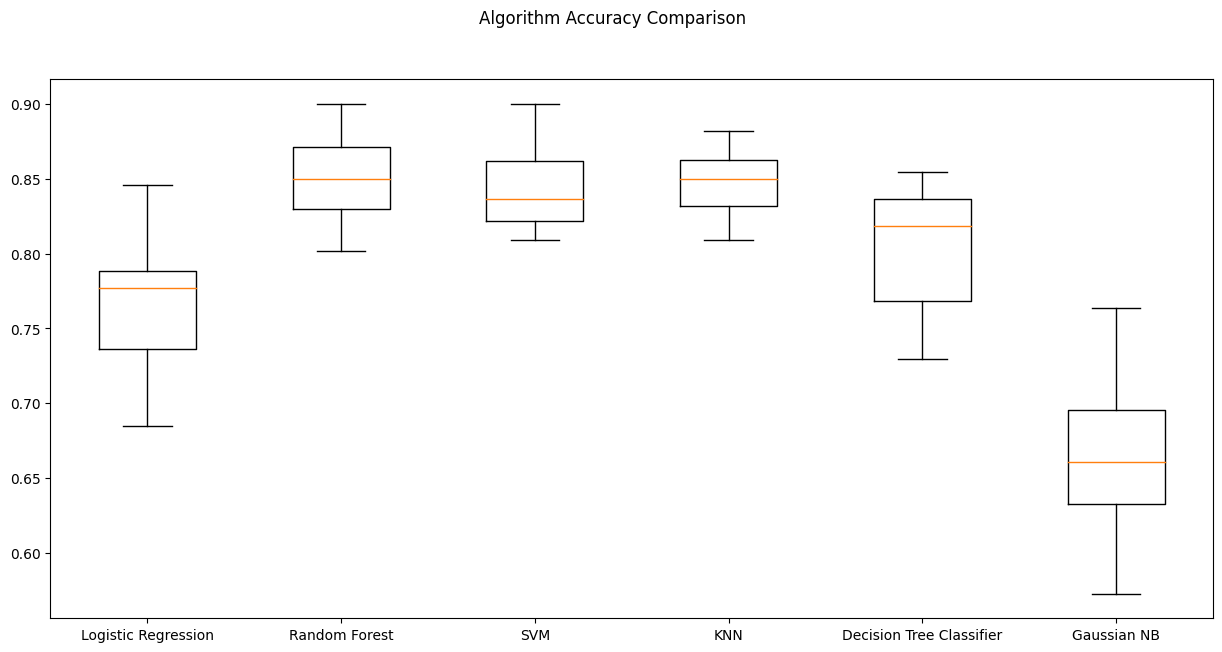

In [ ]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_res)
ax.set_xticklabels(names)
plt.show()

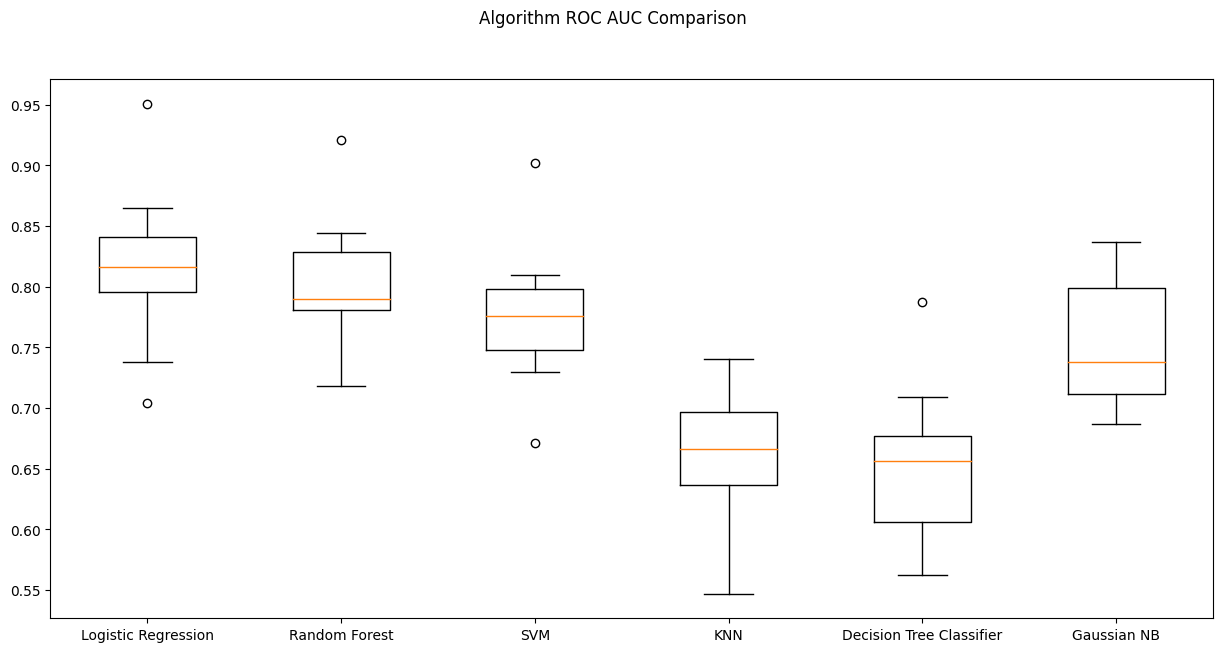

In [ ]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_res)
ax.set_xticklabels(names)
plt.show()

На основе нашего сравнительного анализа ROC AUC, **Logistic Regression** и **Random Forest** показывают самые высокие средние значения AUC. Мы перечислим эти алгоритмы для дальнейшего анализа.

**Logistic Regression** - это алгоритм классификации с помощью машинного обучения, который используется для прогнозирования вероятности категориальной зависимой переменной. Logistic Regression - это алгоритм классификации, который не так сложен, как методы ансамбля или расширенные деревья решений. Следовательно, он дает нам хороший ориентир.

In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight='balanced',
                             random_state=7)
scoring = 'roc_auc'
res = model_selection.cross_val_score(
    modelCV, X_train, y_train, cv = kfold, scoring=scoring
)

In [ ]:
print("AUC score (STD): %.2f (%.2f)" % (res.mean(), res.std()))

AUC score (STD): 0.82 (0.06)


In [ ]:
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # настройка GridSearchCV
                                         class_weight="balanced",
                                         random_state=7),
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: LogisticRegression(C=0.10099999999999998, class_weight='balanced',
                   random_state=7, solver='liblinear')
best params: {'C': 0.10099999999999998}
best score: 0.8154962538233308


Как показано выше, результаты GridSearchCV предоставили нам точно настроенный гиперпараметр, использующий ROC_AUC в качестве показателя оценки.

**Evaluation (Оценка)**

Text(0.5, 427.9555555555555, 'Predicted label')

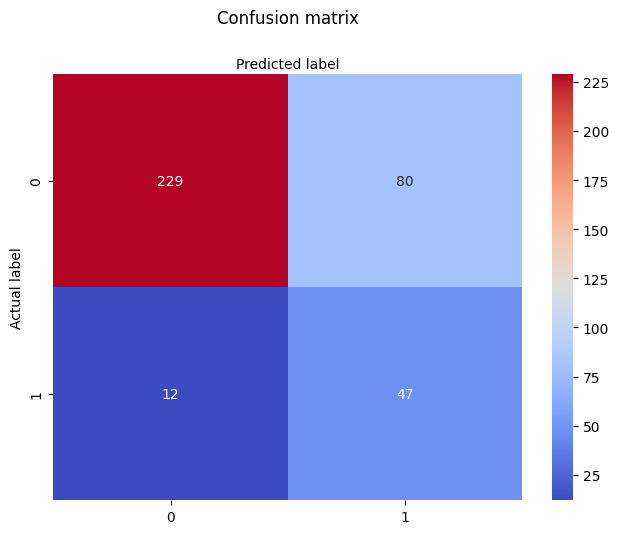

In [ ]:
cnf_matrix = confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[0,1] # названия классов
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# создание heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print('Точность Logistic Regression Classifier в тестовом множестве: {:.2f}'.format(log_opt.score(X_test, y_test)*100))

Точность Logistic Regression Classifier в тестовом множестве: 75.00


Матрица **Confusion** дает нам понять, что у нас есть 229+47 правильных прогнозов и 80+12 неправильных. Другими словами, точность составляет 75%.

In [ ]:
# Отчет о классификации для optimised Log Regression
log_opt.fit(X_train, y_train)
print(classification_report(y_test, log_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.95      0.74      0.83       309
         1.0       0.37      0.80      0.51        59

    accuracy                           0.75       368
   macro avg       0.66      0.77      0.67       368
weighted avg       0.86      0.75      0.78       368



In [ ]:
log_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = log_opt.predict_proba(X_test) # predict probabilities(предсказываем вероятность)
probs = probs[:, 1] # мы сохраним только вероятности, связанные с employee leaving
logit_roc_auc = roc_auc_score(y_test, probs) # вычисление AUC score используя test dataset
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.857


Вместо получения двоичных оценочных целевых характеристик (0 или 1), вероятность может быть связана с прогнозируемой переменной.
Выходные данные содержат первый индекс, относящийся к вероятности того, что данные относятся к **классу 0** (employee not leaving), а второй - к вероятности того, что данные относятся к **классу 1** (employee leaving).

Итоговый показатель AUC равен 0,857, что выше наилучшего показателя на этапе оптимизации.

# Random Forest Classifier

 Подробнее рассмотрим использование алгоритма Random Forest. Я уточню гиперпараметры алгоритма Random Forest путем перекрестной проверки на соответствие показателю AUC

**Fine-tuning**

In [ ]:
rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_classifier,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best params: RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=3, min_samples_split=8, random_state=7)
best params: {'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
best score: 0.792510434904833


In [ ]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

**Random Forest** помог нам определить 10 наиболее важных показателей (ранжированных в таблице ниже) следующим образом:

1.   MonthlyIncome
2.   OverTime
3.   Age
4.   MonthlyRate
5.   DistanceFromHome
6.   DailyRate
7.   TotalWorkingYears
8.   YearsAtCompany
9.   HourlyRate
10.  YearsWithCurrManager

In [ ]:
importances = rf_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(44):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

**Evaluation (Оценка)**

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, rf_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print('Accuracy of RandomForest Regression Classifier on test set: {:.2f}'.format(rf_opt.score(X_test, y_test)*100))

Confusion matrix сообщает нам, что у нас есть 303+14 правильных прогноза и 1+52 неверных. Другими словами, точность составляет 86,14%.

In [ ]:
# Classification report for the optimised RF Regression
rf_opt.fit(X_train, y_train)
print(classification_report(y_test, rf_opt.predict(X_test)))

Использование вероятностного прогнозирования класса привело к тому, что показатель AUC составил 0,818, что выше наилучшего показателя на этапе оптимизации.

In [ ]:
rf_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = rf_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
rf_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % rf_opt_roc_auc)


# ROC Graphs

Кривая **AUC - ROC** - это показатель эффективности задачи классификации при различных установках пороговых значений. **ROC** - это кривая вероятности, а **AUC** представляет степень или показатель отделимости. Она показывает, насколько модель способна различать классы.
Зеленая линия представляет собой кривую **ROC** чисто случайного классификатора; хороший классификатор держится как можно дальше от этой линии (ближе к верхнему левому углу).

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

NameError: name 'rf_opt' is not defined

# Заключение

**Оценка риска**

По мере того, как компания генерирует больше данных о своих сотрудниках - о новых сотрудниках и недавно уволенных - модель может быть переобучена с использованием этих дополнительных данных. И теоретически может давать более точные прогнозы для выявления сотрудников с высоким риском увольнения на основе вероятностной метки, присвоенной каждому сотруднику.

Сотрудникам можно присвоить атрибут Оценка риска, полученный по результатам предсказанной метки:

*   Низкий уровень риска для сотрудников с меткой < 0,6
*   Средний уровень риска для сотрудников с меткой от 0,6 до 0,8
*   Высокий уровень риска для сотрудников с меткой выше 0,8

**Индикаторы и стратегия удержания**

Самые важные индикаторы увольняющихся сотрудников включают в себя:


*   **Месячный доход**. Люди с более высокой заработной платой реже уходят из компании. Следовательно, необходимо приложить усилия для сбора информации об отраслевых ориентирах на местном рынке труда, чтобы определить, обеспечивает ли компания конкурентоспособную заработную плату.
*   **Переработки**. Люди, которые работают сверхурочно, чаще уходят из компании. Следовательно, должны быть предприняты усилия для заблаговременного определения масштабов проектов с соответствующей поддержкой и человеческими ресурсами, чтобы сократить переработки.
*    **Возраст**. Чаще увольняются сотрудники относительно молодой возрастной группы 25–35 лет. Следовательно, необходимо приложить усилия, чтобы четко сформулировать долгосрочное видение компании и молодых сотрудников, соответствующих этому видению, а также предоставить стимулы в виде, например, четких путей продвижения по службе.
*    **Расстояние от дома**. Сотрудники, которым дальше добираться на место работы от дома, с большей вероятностью покинут компанию. Следовательно, можно оказать поддержку в виде трансфера за счет компании для групп сотрудников, выезжающих из одного района, или в форме транспортных надбавок. Первоначальная проверка сотрудников на предмет удаленности их места проживания, вероятно, не рекомендуется, так как это будет рассматриваться как форма дискриминации, тем более если сотрудники приходят на работу вовремя.
*   **Общий стаж**. Более опытные сотрудники с меньшей вероятностью уйдут. Сотрудники со стажем от 5 до 8 лет потенциально подвержены более высокому риску увольнения
*   **Лет в компании**. Сотрудники, отработавшие в компании два года, подвержены более высокому риску увольнения.
*   **Лет под руководством нынешнего начальника**. Много сотрудников ушли в течение шести месяцев после перехода под руководство нынешнего начальника. По данным о руководителе каждого сотрудника можно определить, у каких руководителей происходит больше всего увольнений.

Рассмотрим некоторые метрики, определяющие, следует ли предпринимать действия с линейным руководителем.


*   Кол-во лет, в течение которых линейный руководитель остается на одной должности. Это может сигнализировать о том, что сотрудникам требуется тренинг по менеджменту или ментор, в идеале из топ-менеджмента.
*   Паттерны уволившихся сотрудников: это может указывать на повторяющиеся закономерности увольнения, и в этом случае могут быть приняты соответствующие меры.



Для каждой группы риска можно сформировать свой план удержания сотрудников. В дополнение к предлагаемым шагам для индикаторов перечисленных выше можно инициировать личные встречи сотрудника HR и сотрудников со средним и высоким уровнем риска для обсуждения условий работы. Кроме того, встреча с непосредственным руководителем этого сотрудника позволит обсудить рабочую среду в команде и можно ли предпринять шаги для ее улучшения.